In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re, math
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install Sastrawi


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
df = pd.read_csv('/content/emotion_song_dataset.csv')

(80, 4)


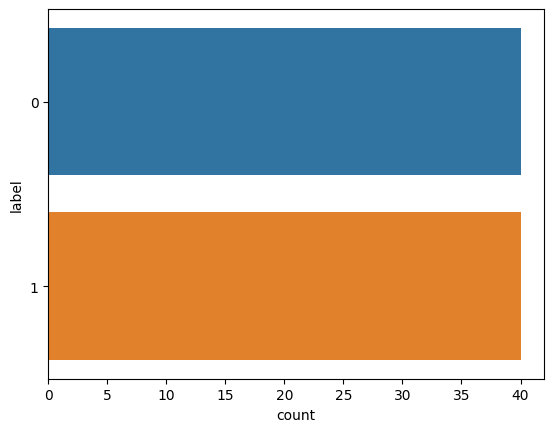

In [ ]:
import seaborn as sns
sns.countplot(y="label", data=df)
print(df.shape)

In [ ]:
def lowerCaseAndNoNumber(list):
    aftrerLower = []
    for sentence in list :
        noNumber = ""
        for word in sentence:
            if word.isdigit() == False :
                noNumber += word
        noNumber = noNumber.lower()
        aftrerLower.append(noNumber)
    return aftrerLower

def punctuationRemover(list):
    noPunctuation = []
    for i in list:
        #^ = negasi
        #\s = white space
        #\w = word character
        clean = re.sub(r"[^\w\s]", "", i)
        noPunctuation.append(clean)

    return noPunctuation

def emojiRemover(list):
    noEmoji = []
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                    "]+", re.UNICODE)
    for i in list:
        clean = re.sub(emoj, "", i)
        noEmoji.append(clean)

    return noEmoji

def normalization(list):
    normalText = []
    for sentence in list:
         #\1 char pertama dari char yang diulang
         #\1+ char yang berulang
        tempNormal =  re.sub(r'(\w)\1+', r'\1', sentence)
        normalText.append(tempNormal)

    return normalText

def split_sentence(sentence):
    result = []
    while(len(sentence) >= 5000):
        i = 5000
        while(sentence[i] != ' '):
            i-=1
        temp = sentence[:i]
        print(temp)
        result.append(temp)
        sentence = sentence[i:]
    result.append(sentence)
    print(sentence)
    return result

def no_abbreviation(list):
    dictonary = {
        'maf' : 'maaf',
        'tdk' : 'tidak',
        'lgi' : 'lagi',
        'bgta' : 'begitu',
        'ngisknpa' : 'kenapa',
        'ga' : 'tidak',
        'jdi' : 'jadi',
        'rapicuman' : 'rapi cuman',
        'emang' : 'memang',
        'emg' : 'memang',
        'gerahand' : 'gerah dan',
        'bhong' : 'bohong',
        'dri' : 'dari',
        'jga' : 'juga',
        'krna' : 'karena',
        'trlalu' : 'terlalu',
        'bgt' : 'banget',
        'asliny':'asli',
        'yg' : 'yang',
        'dlu' : 'dulu',
        'seler' : 'seller',
        'ky':'kayak',
        'dgn' : 'dengan',
        'baklgus' : 'bagus',
        'yh':'yah',
        'realpict' : 'foto asli',
        'yearbok' : 'yearbook',
        'tingi' : 'tinggi',
        'lgsg':'langsung',
        'cm' : 'cuma',
        'tak' : '',
        'gak' :'tidak',
        'thankyou': 'terimakasih',
        'sih':'',
        'it' : '',
        'nya' : '',
        'ny' : '',
        'karna' : 'karena',
        'bahanya': 'bahan',
        'camera' : 'kamera',
        'thanks' : 'terimakasih',
        'seller' : 'penjual',
        'ya' : '',
        'bukak': 'buka',
        'real' : 'asli',
        'next' : 'lanjut',
        'order' : 'pesanan',
        'deh':'',
        'worth':'bernilai',
        'and' : 'dan',
        'bet': '',
        'dah': '',
        'tebel':'tebal',
        'kak':'kakak',
        'datengnya': '',
        'kasi':'berikan',
        'kainya':'kain',
        'jahitanya':'jahit',
        'dateng' : 'datang',
        'nyampe' : 'sampai',
        'yah': '',
        'se': '',


    }
    result = []
    for sentence in list:
        pattern =  re.compile(r'\b('+'|'.join(dictonary.keys())+r')\b')
        temp = pattern.sub(lambda x: dictonary[x.group()], sentence)
        result.append(temp)
    return result

def remove_empty_token(data_list):
    result_data = []
    for document in data_list:
        temp_dokumen = []
        # print(document)
        for token_index in range(len(document)):
            # print(document[token_index])
            if document[token_index] != '':
                temp_dokumen.append(document[token_index])
        result_data.append(temp_dokumen)

    return result_data





def tokenization(list):
    token = []
    for sentence in list:
        tempToken = []
        for word in sentence.split():
            tempToken.append(word)
        token.append(tempToken)
    return token

def stopWord(list):
    stopwordIndo = set(stopwords.words('indonesian'))

    afterStopwords = []
    for sentence in list :
        tempFilter = []
        for word in sentence:
            if word not in stopwordIndo:
                tempFilter.append(word)
        afterStopwords.append(tempFilter)

    return afterStopwords

def stemming(list):
    stemFactory = StemmerFactory()
    nazief = stemFactory.create_stemmer('nazief')

    stem = []
    for data in list:
        tempStem = []
        for word in data:
            tempStem.append(nazief.stem(word))
        stem.append(tempStem)

    return stem

def wordSort(lists):
    words = []
    for Doc in lists:
        # print(Doc)
        for word in Doc:
            # print(word)
            if word not in words:
                # print(type(word))
                words.append(word)
                # print(words)

    words.sort()

    return words

def TFIDF(list, words):
    #banyak dokumen
    #term frecuency
    tf = []
    for doc in list:
        # list berisi 1
        tempDoc = [1 for i in range(len(words))]
        for word in doc:
            # menambahkan 1 untuk setiap kata yang ditemukan
            tempDoc[words.index(word)] += 1
        tf.append(tempDoc)
    n = len(list)
    df = [0 for i in range(len(words))]
    for doc in list:
        for word in set(doc):
            if word in words:
                index = words.index(word)
                df[index] =+ 1

    idf = [0 for i in range(len(words))]
    for i in range(len(df)):
        if df[i] > 0:
            idf[i] = math.log(n/df[i])



    tf_idf = []
    for subList in range(len(tf)):
        tempTFIDF = []
        for i in words:
            a = tf[subList][words.index(i)]
            b = idf[words.index(i)]
            # tf * idf
            tempTFIDF.append(a*b)
        tf_idf.append(tempTFIDF)

    tf_idf = pd.DataFrame(tf_idf, index=["document_" + str(i+1) for i in range(len(tf_idf))])
    for i in range(len(words)):
        tf_idf = tf_idf.rename(columns={i:words[i]})

    return tf_idf

def oneHotEncoder(data, word_sorted):
    # One-hot encoding
    one_hot = {}
    for word in word_sorted:
        one_hot[word] = [1 if word in doc else 0 for doc in data]
    # Convert to dataframe
    df = pd.DataFrame(one_hot, index=["document_" + str(i+1) for i in range(len(data))])

    return df.transpose()

def basicBow(data, word_sorted):

    # inisialisasi empty array untuk menampung bag-of-words
    bag_of_words = []
    for d in data:
        row = []
        for word in word_sorted:
            count = d.count(word)
            row.append(count)
        bag_of_words.append(row)
    df = pd.DataFrame(bag_of_words, columns=list(word_sorted),
                      index=["document_" + str(i+1) for i in range(len(data))])
    df = df.transpose()
    return df


In [ ]:
lyrics = df['lyrics'].tolist()
label =  df['label'].tolist()

In [ ]:
from sklearn.utils import shuffle

lyrics = lowerCaseAndNoNumber(lyrics)
lyrics = emojiRemover(lyrics)
lyrics = punctuationRemover(lyrics)
lyrics = normalization(lyrics)
lyrics = no_abbreviation(lyrics)
lyrics = tokenization(lyrics)
lyrics = stopWord(lyrics)
lyrics_stem = stemming(lyrics)
lyrics_word = wordSort(lyrics_stem)




In [ ]:
BoW_lyrics = TFIDF(lyrics_stem,lyrics_word)

In [ ]:
print(BoW_lyrics.transpose()[:20])

         document_1  document_2  document_3  document_4  document_5  \
a          4.382027    4.382027    4.382027    4.382027    4.382027   
abadi      4.382027    4.382027    4.382027    4.382027    4.382027   
abai       4.382027    4.382027    4.382027    4.382027    4.382027   
abuabu     4.382027    4.382027    4.382027    4.382027    4.382027   
ada        4.382027    4.382027    4.382027    4.382027    4.382027   
adegan     4.382027    4.382027    4.382027    4.382027    4.382027   
adil       4.382027    4.382027    4.382027    4.382027    4.382027   
adinda     4.382027    4.382027    4.382027    4.382027    4.382027   
agustus    4.382027    4.382027    4.382027    4.382027    4.382027   
ahahah     4.382027    4.382027    4.382027    4.382027    4.382027   
ahli       4.382027    4.382027    4.382027    4.382027    4.382027   
air        4.382027    4.382027    4.382027    4.382027    4.382027   
aja        4.382027    4.382027    4.382027    4.382027    4.382027   
ajaib 

In [ ]:
BoW_lyrics

,a,abadi,abai,abuabu,ada,adegan,adil,adinda,agustus,ahahah,...,wajar,waktu,wanita,warna,warnawarni,wiski,wo,wuwuwuwuwuwuwuwu,yakin,yeah
document_1,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_2,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_3,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_4,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_5,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
document_76,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,8.764053,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_77,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,8.764053,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_78,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,8.764053,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_79,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,8.764053,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(BoW_lyrics, label,
                                                    test_size=0.2 , # Train Data 80:20 Test Data
                                                    random_state=50)


In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy}, {recall}, {precision}, {f1} ')

0.75, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143 


In [ ]:
from sklearn.svm import SVC


In [ ]:
classifier = SVC(kernel ='sigmoid')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,
                            y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy}, {recall}, {precision}, {f1} ')

0.4375, 1.0, 0.4375, 0.6086956521739131 


In [ ]:
classifier = SVC(kernel ='poly', degree = 4)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,
                            y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy}, {recall}, {precision}, {f1} ')

0.875, 0.7142857142857143, 1.0, 0.8333333333333333 


In [ ]:
classifier = SVC(kernel ='rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,
                            y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy}, {recall}, {precision}, {f1} ')

0.75, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143 


In [ ]:
classifier = SVC(kernel ='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test,
                            y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'{accuracy}, {recall}, {precision}, {f1} ')

0.8125, 0.7142857142857143, 0.8333333333333334, 0.7692307692307692 


In [ ]:
X_test

,a,abadi,abai,abuabu,ada,adegan,adil,adinda,agustus,ahahah,...,wajar,waktu,wanita,warna,warnawarni,wiski,wo,wuwuwuwuwuwuwuwu,yakin,yeah
document_80,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_18,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,17.528107,17.528107,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_67,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,8.764053,4.382027
document_46,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_17,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_45,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_65,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,21.910133,4.382027
document_9,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_37,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,8.764053,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027
document_19,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,...,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027,4.382027


Aku membeli buku

In [ ]:
train = pd.DataFrame({
    'aku': [5, 0],
    'membeli': [5, 0],
    'buku' : [5,0],
    'saya' : [0,9],
    'mouse' : [1,2]
    })
train_label = [1,0]
train

,aku,membeli,buku,saya,mouse
0,5,5,5,0,1
1,0,0,0,9,2


In [ ]:
test = pd.DataFrame({
    'aku': [1],
    'membeli': [1],
    'buku' : [1],
    'saya' : [5],
    'mouse' : [5]
    })

classifier = SVC(kernel ='linear')
classifier.fit(train, train_label)
y_pred = classifier.predict(test)



In [ ]:
y_pred

array([0])